In [26]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [27]:
# (a) import and check the data, making sure they are imported as integers.
train_data = np.loadtxt("/Users/fanyingtang/Desktop/homework_1/project_1/train.csv",\
                        delimiter=",", \
                        skiprows=1, \
                        usecols=range(0,785), \
                        dtype=np.uint64)
train_label = np.loadtxt("/Users/fanyingtang/Desktop/homework_1/project_1/train.csv", \
                         delimiter=",", \
                         skiprows=1, \
                         usecols = range(0,1), \
                         dtype = np.uint64)

digit_label = np.unique(train_label)

hei = wid = int(math.sqrt(train_data.shape[1]-1))

print("the height and width of the digit is %s and %s" % (hei, wid))

print(digit_label)

the height and width of the digit is 28 and 28
[0 1 2 3 4 5 6 7 8 9]


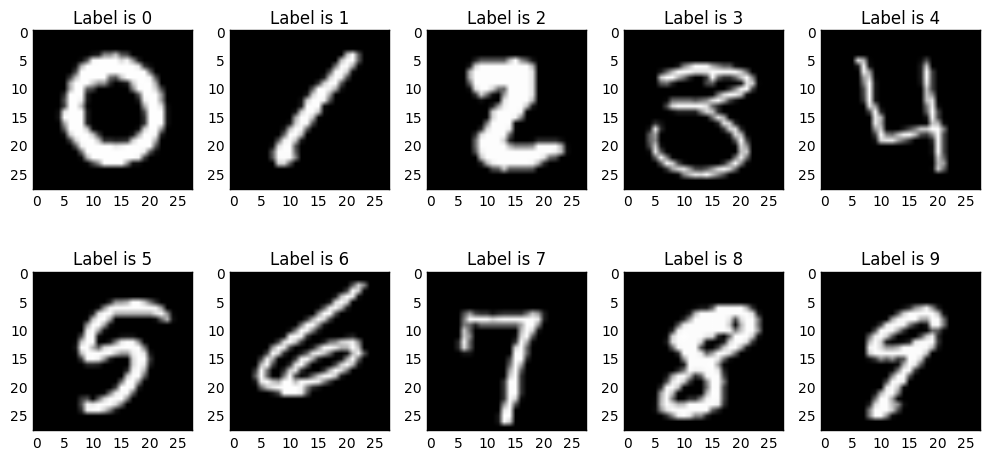

In [3]:
# (b) Write a function to display an MNIST digit. Display one of each digit.
plt.figure(figsize=(10, 5))

count = 0
for i in digit_label:
    count = count + 1
    digit_pixel = train_data[train_data[:,0] == i][0, 1:].reshape(hei,wid)
    ax = plt.subplot(2, 5, count)
    ax.set_title('Label is %s'% (i))
    ax.imshow(digit_pixel, cmap='gray')
plt.tight_layout()

   digit  prior prob
0      0    0.098381
1      1    0.111524
2      2    0.099452
3      3    0.103595
4      4    0.096952
5      5    0.090357
6      6    0.098500
7      7    0.104786
8      8    0.096738
9      9    0.099714


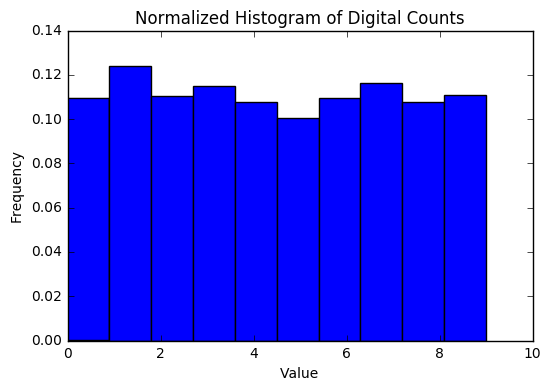

In [4]:
# (c) 
# Examine the prior probabality
digit_prob_list = []
for i in digit_label:
    digit_count = train_label.tolist().count(digit_label[i])
    digit_prob = digit_count / train_data.shape[0]
    digit_prob_list.append(digit_prob)
digit_prob_data = {'digit': digit_label, 'prior prob':digit_prob_list}
digit_prob_data = pd.DataFrame(data = digit_prob_data)
print(digit_prob_data)

# plot the histogram
plt.hist(train_label, normed=True)
plt.title("Normalized Histogram of Digital Counts")
plt.xlabel("Value")
plt.ylabel("Frequency")



.
.
.
.
.
.
.
.
.
.


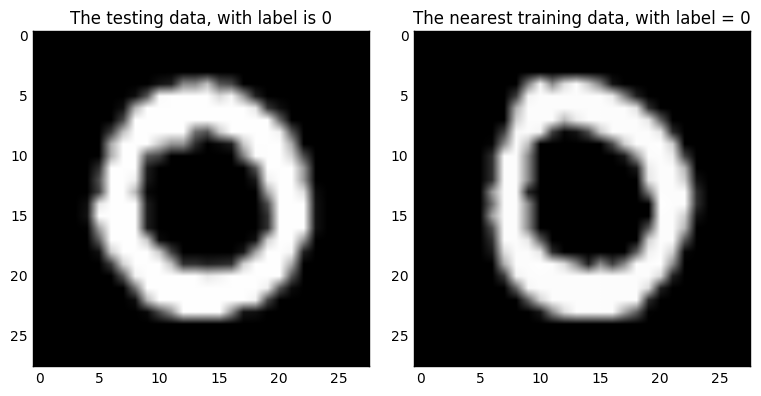

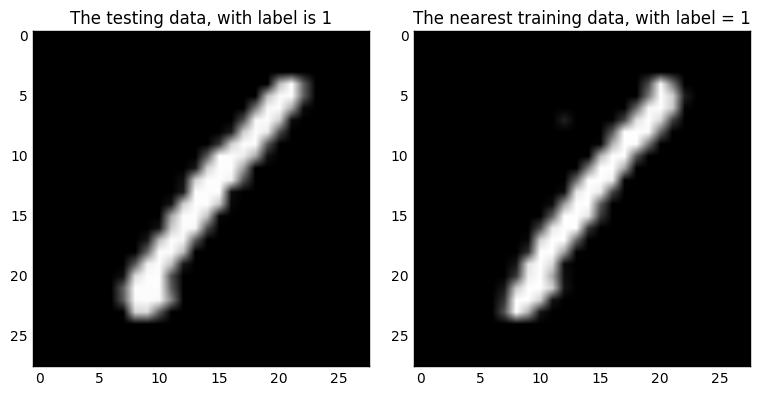

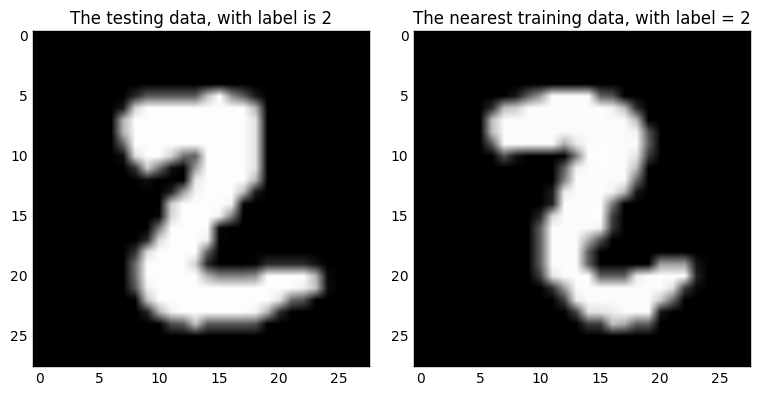

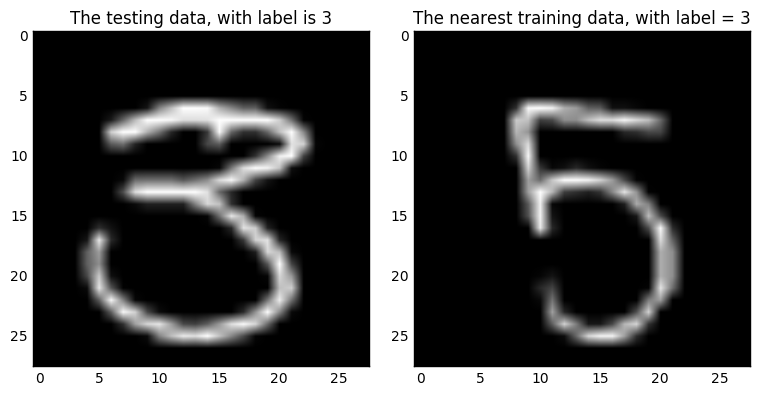

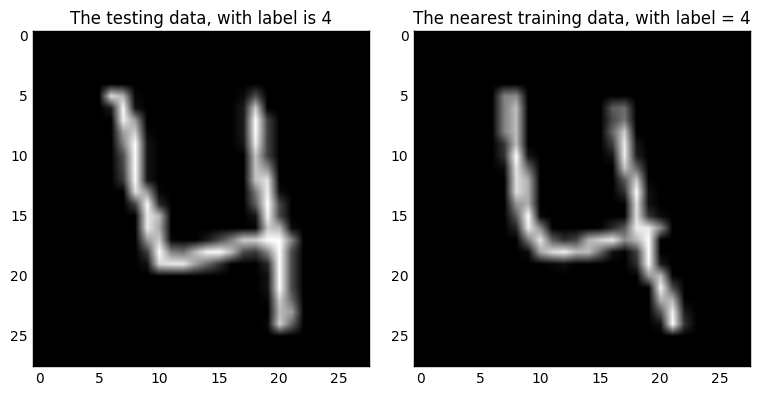

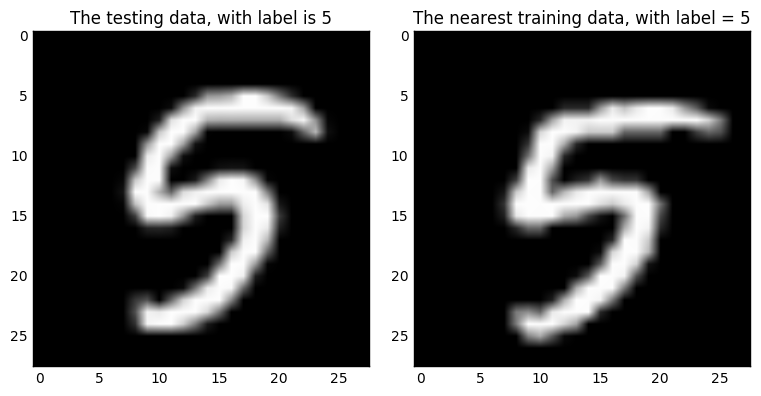

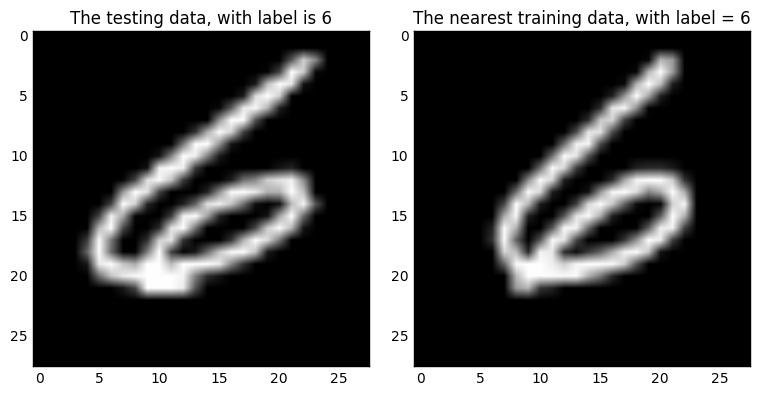

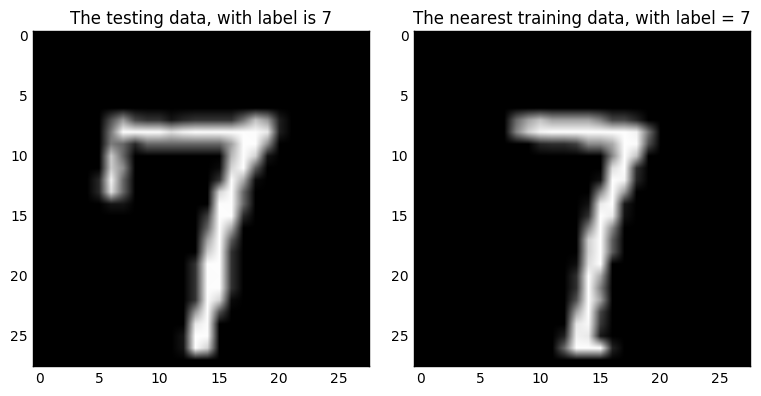

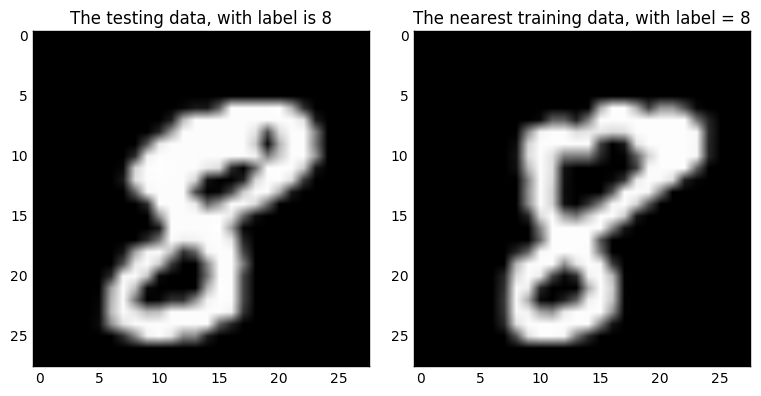

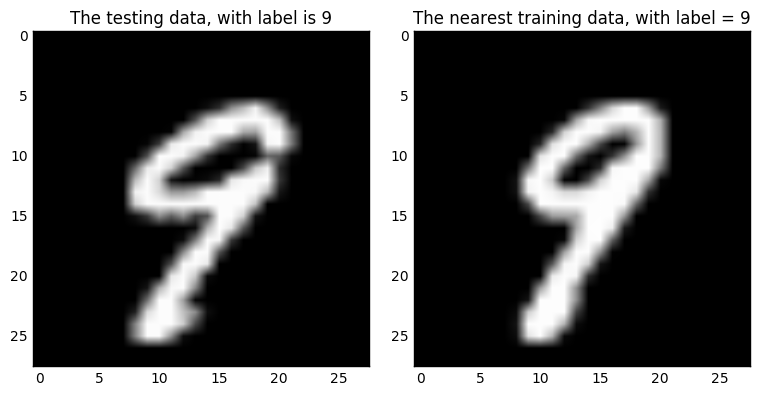

In [5]:
# (d)
"""Pick one example of each digit from your training data. Then, for each sample digit, compute
and show the best match (nearest neighbor) between your chosen sample and the rest of
the training data. Use L2 distance between the two images’ pixel values as the metric. This
probably won’t be perfect, so add an asterisk next to the erroneous examples (if any)."""

# find the featured vector of the digit to be tested
def test_digit(input_data, i):
    test = train_data[input_data[:,0] == i][0, 1:]
    return test

# calculate the Euclidean distance between two digits
# sample1 and sample2 are arrays
def digit_distance(sample1, sample2):
    dist = math.sqrt(sum((sample1 - sample2) ** 2))*1.0
    return dist

# find the k nearest neighbours
# trainingSet, testInstance are arrays. k is an integer.
import operator
def getNeighbors(trainingSet, testInstance, k):
    neighbor_distances = []
    for row in trainingSet:
        dist = digit_distance(testInstance, row)
        neighbor_distances.append((row, dist))
        
    neighbor_distances.sort(key=operator.itemgetter(1))
    neighbors = []
    
    # avoid pairing with itself by using range(k+1) and removing the first returned item.
    for x in range(k+1):
        neighbors.append(neighbor_distances[x][0])
        
    return neighbors[1:]


for digit in digit_label: 
    plt.figure(figsize=(8, 4))
    neighbor_array = getNeighbors(trainingSet = train_data[:, 1:], \
                                  testInstance = test_digit(train_data, digit), \
                                  k = 1)
    
    pixel_test = test_digit(train_data, digit).reshape(28,28)
    ax_1 = plt.subplot(1, 2, 1)
    ax_1.set_title('The testing data, with label is %s'% (digit))
    ax_1.imshow(pixel_test,cmap = 'gray')
    
    pixel_neighbor = np.array(neighbor_array).reshape(hei,wid)
    ax_2 = plt.subplot(1, 2, 2)
    ax_2.set_title('The nearest training data, with label = %s'% (digit))
    ax_2.imshow(pixel_neighbor,cmap = 'gray')
    
    plt.tight_layout()
    plt.savefig('nearest_neighbors %s.png' % (digit))
    
    print(".")

In [6]:
# (e) 
"""Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other
digits, compute the pairwise distances for all genuine matches and all impostor matches,
again using the L2 norm. Plot histograms of the genuine and impostor distances on the same
set of axes."""
# collect all the vectors for digits 0 and 1
binary_data = []
binary_data_label = []
count = 0
for i in train_label:
    if i == 1 or i == 0:
        binary_data.append(train_data[count, 1:])
        binary_data_label.append(i)
    count = count+1
print(len(binary_data), len(binary_data_label))
    
# calculate the distance between two digits
import scipy.spatial
from scipy.spatial import distance

genuine_distance = []
impostor_distance = []
bi_dist_mat = scipy.spatial.distance.cdist(binary_data, binary_data, 'euclidean')
print(bi_dist_mat.shape)

#split into genuine_distance and imposter_distance
for i in range(bi_dist_mat.shape[0]):
    for j in range(bi_dist_mat.shape[1]):
        if i != j:
            if binary_data_label[i] == binary_data_label[j]:
                genuine_distance.append(bi_dist_mat[i][j])
            else:
                impostor_distance.append(bi_dist_mat[i][j])
            

8816 8816
(8816, 8816)


In [7]:
print(len(genuine_distance))
print(len(impostor_distance))

39004464
38708576


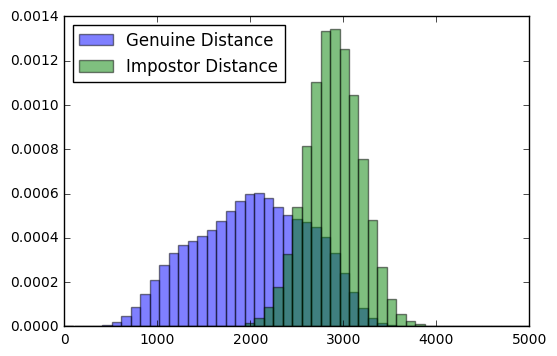

In [8]:
bins = np.linspace(0, 5000, 50)

plt.hist(genuine_distance, bins, alpha=0.5, normed = True, label='Genuine Distance')
plt.hist(impostor_distance, bins, alpha=0.5, normed = True, label='Impostor Distance')
plt.legend(loc='upper left')
plt.show()

In [20]:
 """
#(f) ROC curve method 1. Took too long for calculation ( 4 for loops)
#Generate an ROC curve from the above sets of distances. What is the equal error rate? What
is the error rate of a classifier that simply guesses randomly?

TPR = []
FPR = []
print(np.amax(impostor_distance))

for i in range(0, 4250, 10):
        TN = sum(j <= i for j in genuine_distance)
        FN = sum(j <= i for j in impostor_distance)
        FP = sum(j > i for j in genuine_distance)
        TP = sum(j > i for j in impostor_distance)
        TPR.append(float(TP)/float(TP+FN))
        FPR.append(float(FP)/float(TN+FP))
    
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

"""  


4202.08555363


KeyboardInterrupt: 

4202.08555363
Equal Error: 18.999944611757353
101 101


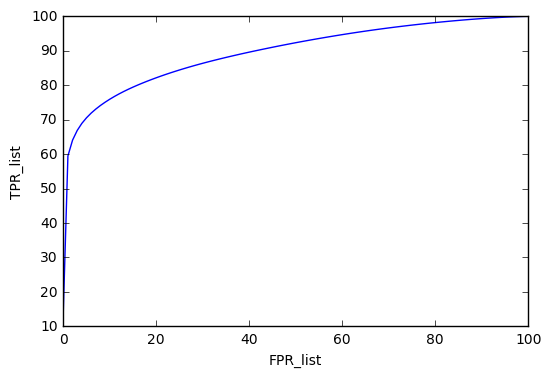

In [17]:
"""Generate an ROC curve from the above sets of distances. What is the equal error rate? What
is the error rate of a classifier that simply guesses randomly?"""
# ROC curve method 2. Took long for calculation (two for loops)
TPR_list = []
FPR_list = []
#print(np.amax(impostor_distance))

genuine_distance_sort = np.sort(genuine_distance)
impostor_distance_sort = np.sort(impostor_distance)


for i in range(0, len(impostor_distance_sort), int(len(impostor_distance_sort)/100)):
    # TPR=TP/TP+FN
    # FPR=FP/TN+FP
    TPR = 100*sum(genuine_distance_sort < impostor_distance_sort[i])/float(len(genuine_distance_sort))
    TPR_list.append(TPR)
    
    FPR = 100*sum(impostor_distance_sort < impostor_distance_sort[i])/float(len(impostor_distance_sort))
    FPR_list.append(FPR)
    
    FNR = 100 - TPR
    if (int(FNR) == int(FPR)):
            print("Equal Error: " + repr(FPR))
    
#print(len(TPR_list), len(FPR_list))


plt.plot(FPR_list, TPR_list)
plt.xlabel('FPR_list')
plt.ylabel('TPR_list')
plt.show()



In [28]:
# (g)Implement a K-NN classifier.
import operator
import scipy.spatial
from scipy.spatial import distance

def Vote(neighbor_dist, trainingLabel, k):
    dist_sorted_index = np.argsort(neighbor_dist)
    classVotes = {}
    for i in range(k):
        vote_index = dist_sorted_index[i]
        vote_ind = trainingLabel[vote_index]
        if vote_ind in classVotes:
            classVotes[vote_ind] +=1
        else:
            classVotes[vote_ind] = 1        
    sortedVotes = sorted(classVotes.items(), key = operator.itemgetter(1), reverse = True)
    return sortedVotes[0][0]


# testingSet is a N1*M matrix for N1 testing sample
# trainingSet is a N2*M matrix of N2 training samples
# trainingLabel is a N2*1 array for N2 training sample labels
# k is the number of nearest neighours chosen
# the returned value is a length = N1 list consisting of the predicted k neareast neighbours
def KNearestNeighbor(testingSet, trainingSet, trainingLabel, k): 
    dist_mat = scipy.spatial.distance.cdist(testingSet, trainingSet, 'euclidean')
    # the result is a N1*N2 matrix
    
    predictions = [] 
    for row in dist_mat:
        predictions.append(Vote(row, trainingLabel, k))
        
    # np.apply_along_axis(Vote(trainingLabel,k), axis=1, arr=dist_mat)
    
    return(predictions)



In [29]:
#(h) Do 3 fold cross validation with k = 3
# evaluate accuracy of prediction
def getAccuracy(testLabel, predictions):
    correct = 0
    for x in range(len(testLabel)):
        if testLabel[x] == predictions[x]:
            correct += 1
    accuracy_rate = (correct/float(len(testLabel))) * 100.0
    return accuracy_rate

# do evaluation on the splitted data for cross validation
def evaluate(fold):
    train_indices, test_indices = fold
    data_train = train_data[:, 1:785][train_indices]
    label_train = train_label[train_indices]
    data_test = train_data[:, 1:785][test_indices]
    label_test = train_label[test_indices]
    predictions = KNearestNeighbor(data_test, data_train, label_train, k=3) # get k=3 nearest neighbors
    accuracy = getAccuracy(label_test, predictions)
    return [accuracy, predictions]

In [30]:
from sklearn import cross_validation
KNN_results = list(map(evaluate, cross_validation.KFold(len(train_label), 3))) # cv = 3 fold validation


In [42]:
# for 3 fold cross validataion
accuracy_total = []
for i in range(3): # range is 3 because of 3 fold crossvalidation
    accuracy_total.append(KNN_results[i][0])  
print(accuracy_total)

averange_accuracy = sum(accuracy_total)/len(accuracy_total)
float("{0:.2f}".format(averange_accuracy))


[96.66428571428571, 96.47857142857143, 96.70714285714286]


96.62

In [31]:
# for k = 1
def evaluate(fold):
    train_indices, test_indices = fold
    data_train = train_data[:, 1:785][train_indices]
    label_train = train_label[train_indices]
    data_test = train_data[:, 1:785][test_indices]
    label_test = train_label[test_indices]
    predictions = KNearestNeighbor(data_test, data_train, label_train, k=1) # get k=1 nearest neighbors
    accuracy = getAccuracy(label_test, predictions)
    return [accuracy, predictions]

from sklearn import cross_validation
KNN_results = list(map(evaluate, cross_validation.KFold(len(train_label), 3)))

accuracy_total_2 = []
for i in range(3):
    accuracy_total_2.append(KNN_results[i][0])  
print(accuracy_total_2)

averange_accuracy_2 = sum(accuracy_total_2)/len(accuracy_total_2)
float("{0:.2f}".format(averange_accuracy_2))

[96.45, 96.31428571428572, 96.55]


96.44

In [32]:
# for k = 5
def evaluate(fold):
    train_indices, test_indices = fold
    data_train = train_data[:, 1:785][train_indices]
    label_train = train_label[train_indices]
    data_test = train_data[:, 1:785][test_indices]
    label_test = train_label[test_indices]
    predictions = KNearestNeighbor(data_test, data_train, label_train, k=5) # get k=5 nearest neighbors
    accuracy = getAccuracy(label_test, predictions)
    return [accuracy, predictions]

from sklearn import cross_validation
KNN_results = list(map(evaluate, cross_validation.KFold(len(train_label), 3)))

accuracy_total_3 = []
for i in range(3):
    accuracy_total_3.append(KNN_results[i][0])  
print(accuracy_total_3)

averange_accuracy_3 = sum(accuracy_total_3)/len(accuracy_total_3)
float("{0:.2f}".format(averange_accuracy_3))

[96.6, 96.47142857142858, 96.61428571428571]


96.56

In [ ]:
# for k = 7
def evaluate(fold):
    train_indices, test_indices = fold
    data_train = train_data[:, 1:785][train_indices]
    label_train = train_label[train_indices]
    data_test = train_data[:, 1:785][test_indices]
    label_test = train_label[test_indices]
    predictions = KNearestNeighbor(data_test, data_train, label_train, k=7) # get k=7 nearest neighbors
    accuracy = getAccuracy(label_test, predictions)
    return [accuracy, predictions]

from sklearn import cross_validation
KNN_results = list(map(evaluate, cross_validation.KFold(len(train_label), 3)))

accuracy_total_4 = []
for i in range(3):
    accuracy_total_4.append(KNN_results[i][0])  
print(accuracy_total_4)

averange_accuracy_4 = sum(accuracy_total_4)/len(accuracy_total_4)
float("{0:.2f}".format(averange_accuracy_4))

In [ ]:
# for k = 9
def evaluate(fold):
    train_indices, test_indices = fold
    data_train = train_data[:, 1:785][train_indices]
    label_train = train_label[train_indices]
    data_test = train_data[:, 1:785][test_indices]
    label_test = train_label[test_indices]
    predictions = KNearestNeighbor(data_test, data_train, label_train, k=9) # get k=1 nearest neighbors
    accuracy = getAccuracy(label_test, predictions)
    return [accuracy, predictions]

from sklearn import cross_validation
KNN_results = list(map(evaluate, cross_validation.KFold(len(train_label), 3)))

accuracy_total_5 = []
for i in range(3):
    accuracy_total_5.append(KNN_results[i][0])  
print(accuracy_total_5)

averange_accuracy_5 = sum(accuracy_total_5)/len(accuracy_total_5)
float("{0:.2f}".format(averange_accuracy_5))

In [48]:
# (i) Generate the confusion matrix
from sklearn.metrics import confusion_matrix

true_label = train_label
predict_label = np.concatenate((KNN_results[0][1], KNN_results[1][1], KNN_results[2][1]), \
                               axis = 0)

confustionMatrix = confusion_matrix(true_label, predict_label, labels=[0,1,2,3,4,5,6,7,8,9])
print(confustionMatrix)





[[4110    0    4    0    0    5   10    0    2    1]
 [   0 4655    8    1    2    1    4    7    3    3]
 [  31   46 3982   12    3    3    4   73   15    8]
 [   6   12   30 4182    0   37    2   21   37   24]
 [   3   43    0    0 3887    0   15    4    3  117]
 [  14    2    1   65    2 3614   43    2   14   38]
 [  26    6    0    0    5   17 4080    0    3    0]
 [   2   54    9    1    8    0    0 4268    0   59]
 [  20   45   10   42   14   68   17   10 3792   45]
 [  14    9    2   26   38   10    2   58   20 4009]]


Normalized confusion matrix


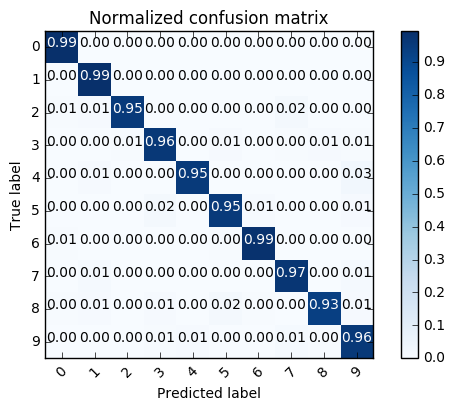

In [44]:
# generate the figure for the normalized confusion matrix
# reference code: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confustionMatrix, classes=["0", "1", "2","3", "4","5","6","7","8","9"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# digit 2, 4, 5, 8 seems to be more dificult to identity

In [15]:
# (j) Do the KNN classification on the test data

#import the testing data
test_data = np.loadtxt("/Users/fanyingtang/Desktop/homework_1/project_1/test.csv",\
                        delimiter=",", \
                        skiprows=1, \
                        usecols=range(0,784), \
                        dtype=np.uint64)
prediction_for_test = KNearestNeighbor(test_data, train_data[:,1:785], train_label, k = 3)


In [25]:
print(len(prediction_for_test))

submit_data = pd.read_csv("/Users/fanyingtang/Desktop/homework_1/project_1/sample_submission.csv")

submission = pd.DataFrame({
        "ImageId": submit_data["ImageId"],
        "Label": prediction_for_test
    })

submission.to_csv('sample_submission.csv', index=False)

28000


0
4
8
12
